In [11]:
import pywt
import numpy as np
import wfdb
import matplotlib.pyplot as plt

In [4]:
record_nsr = wfdb.rdrecord('./data/nsrdb/16265')
record_scd = wfdb.rdrecord('./data/scddb/30')

In [5]:
ecg_signal_nsr =  record_nsr.p_signal[:,0]
ecg_signal_scd =  record_scd.p_signal[:,0]

wavelet = 'db4'
level = 4 

In [6]:
ecg_signal_nsr

array([-0.165, -0.155, -0.195, ..., -0.05 , -0.05 , -0.05 ])

In [7]:
ecg_signal_scd

array([ 0.06375,  0.0725 ,  0.08375, ..., -0.985  , -1.     , -0.9925 ])

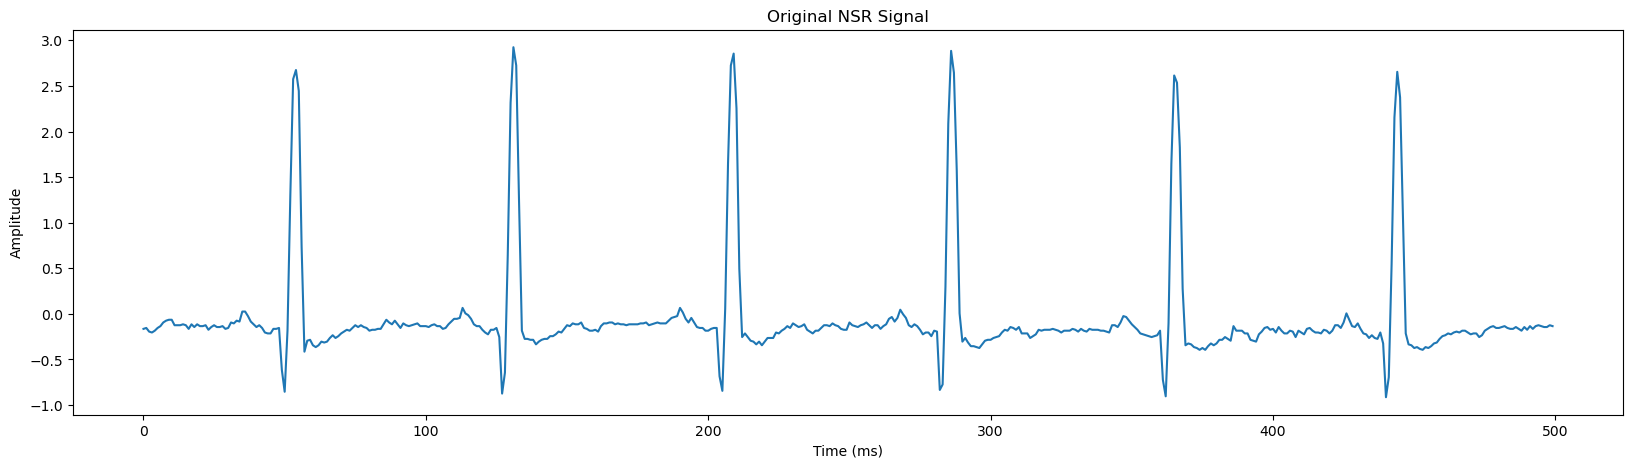

In [17]:
plt.figure(figsize=(20, 5))
plt.subplot()
plt.plot(ecg_signal_nsr[0:500])
plt.title('Original NSR Signal')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')

plt.show()

In [18]:
# 1. Decompose signal
coeffs_nsr = pywt.wavedec(ecg_signal_nsr, wavelet, level=level)
coeffs_scd = pywt.wavedec(ecg_signal_scd, wavelet, level=level)

In [26]:
# 2. Determine a threshold (e.g., universal threshold)
# Estimate noise sigma from detail coeffs at highest level
detail_coeffs_nsr = coeffs_nsr[-1]
sigma = np.median(np.abs(detail_coeffs_nsr)) / 0.6745
threshold = sigma * np.sqrt(2 * np.log(len(ecg_signal_nsr)))

In [27]:
coeffs_thresh_nsr = [coeffs_nsr[0]]  # keep approximation coeff
for c in coeffs_nsr[1:]:
    coeffs_thresh_nsr.append(pywt.threshold(c, threshold, mode='soft'))

# 3. Reconstruct the denoised signal
ecg_denoised_nsr = pywt.waverec(coeffs_thresh_nsr, wavelet)

In [28]:
ecg_denoised_nsr

array([-0.15996555, -0.15483972, -0.14879509, ..., -0.04960045,
       -0.04965118, -0.04964727])

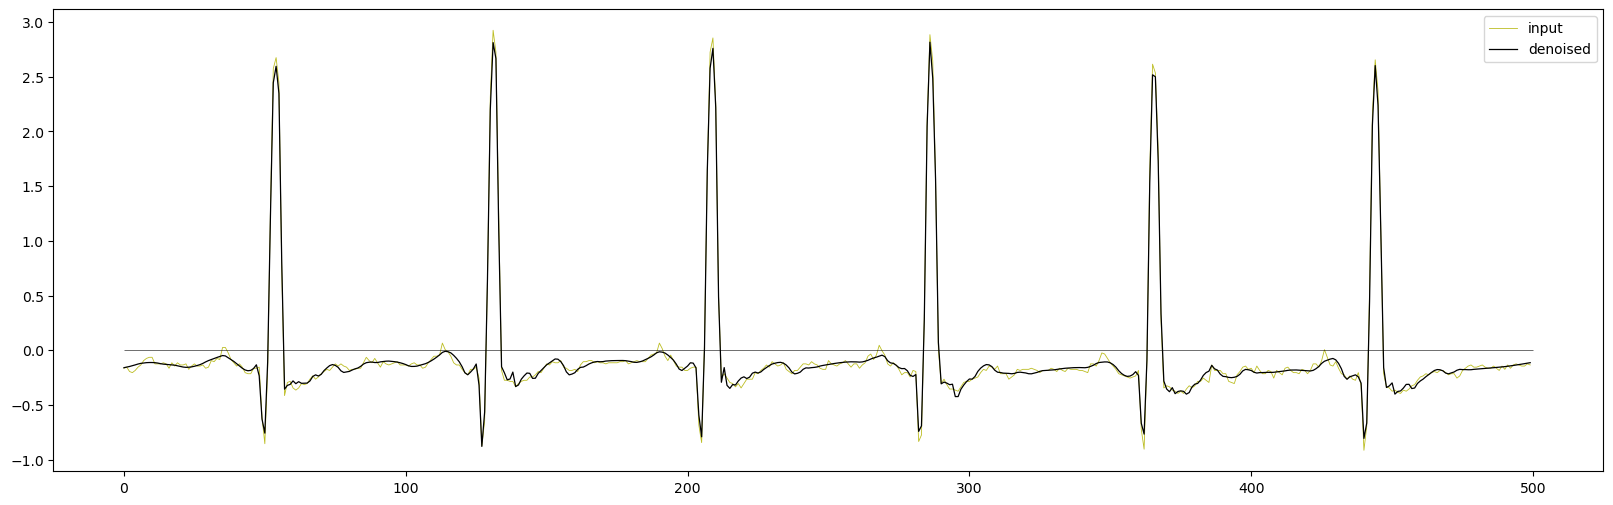

In [29]:
plt.figure(figsize=(20,6))

plt.plot(ecg_signal_nsr[0:500], color='tab:olive', linewidth=0.6,label = 'input')
plt.plot(ecg_denoised_nsr[0:500], color='black', linewidth=0.9,label = 'denoised')
plt.hlines(0,0,500,color='black', linewidth=0.4)
plt.legend()
plt.show()

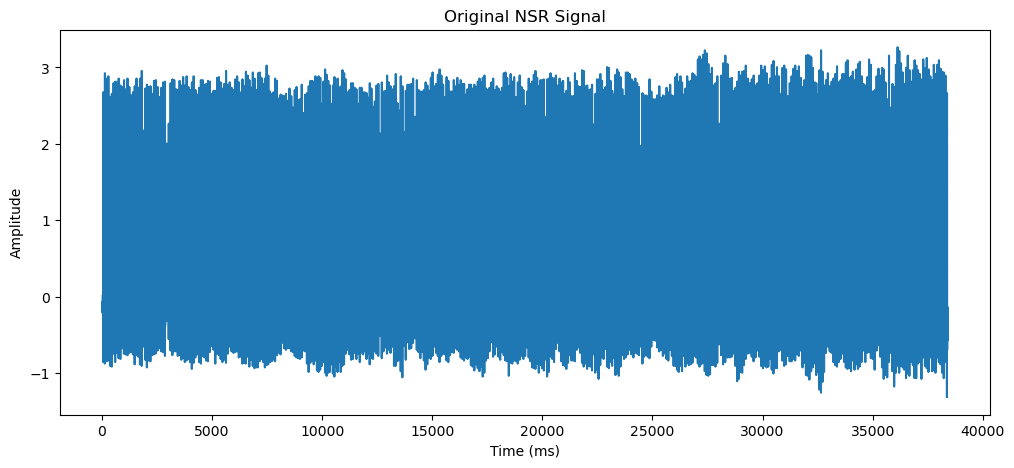

In [40]:
plt.figure(figsize=(12, 5))
plt.subplot()
plt.plot(ecg_signal_nsr[:38400])
plt.title('Original NSR Signal')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')

plt.show()

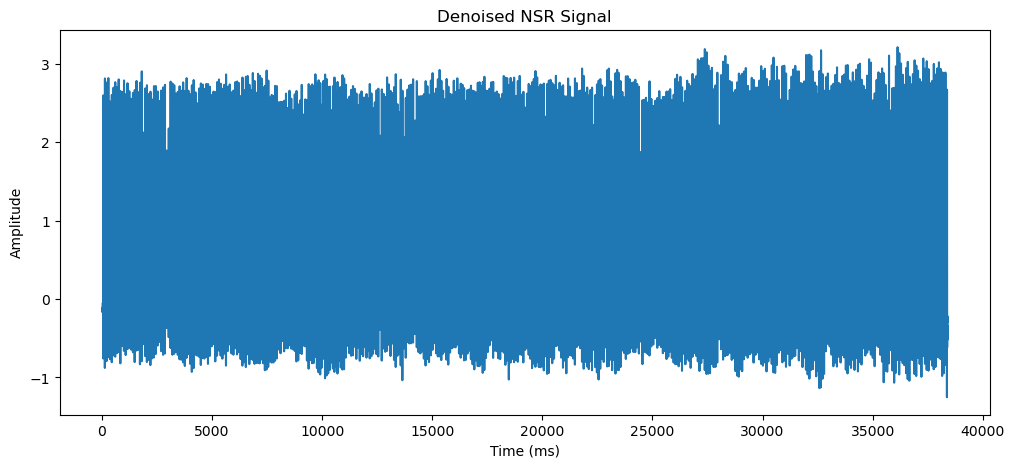

In [41]:
plt.figure(figsize=(12, 5))
plt.subplot()
plt.plot(ecg_denoised_nsr[:38400])
plt.title('Denoised NSR Signal')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')

plt.show()